<a href="https://colab.research.google.com/github/KS-Mohit/Netflix-Movies-TV-Shows-Clustering/blob/main/Copy_of_ML_EDA%26Clustering_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Contributor Name** - Mohit Kumar


# **Project Summary -**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Initially i have start with understanding the dataset, then i clean the data to make analysis ready.

Explore the data and understand the behaviour of the same.

Then i have prepare the dataset for creating clusters by various parameters wherein i can remove stop words, white spaces numbers etc. so that i can get important words and based on that i shall form clusters.

Later i have used the silhouette method and k-means elbow method to find optimal number of clusters and built recommender system by cosine similarity and recommended top ten movies.

# **GitHub Link -**

https://github.com/KS-Mohit/Netflix-Movies-TV-Shows-Clustering

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

**In this project, required to do:**


*   Exploratory Data Analysis.
*   Understanding what type content is available in different countries.

*   Is Netflix has increasingly focusing on TV rather than movies in recent years.
*   Clustering similar content by matching text-based features.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for hypothesis testing
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import ttest_ind
import scipy.stats as stats
from scipy.stats import chi2_contingency


# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# Library used for textual data preprocessing
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from statsmodels.stats.proportion import proportions_ztest

# Library used for Clusters implementation
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import *

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [ ]:
# Load Dataset from github repository
df = pd.read_csv("https://raw.githubusercontent.com/KS-Mohit/Netflix-Movies-TV-Shows-Clustering/refs/heads/main/NETFLIX%20MOVIES%20AND%20TV%20SHOWS%20CLUSTERING.csv")

### Dataset First View

In [ ]:
# Dataset First Look
# View top 5 rows of the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  7787
Number of columns are:  12


### Dataset Information

In [ ]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


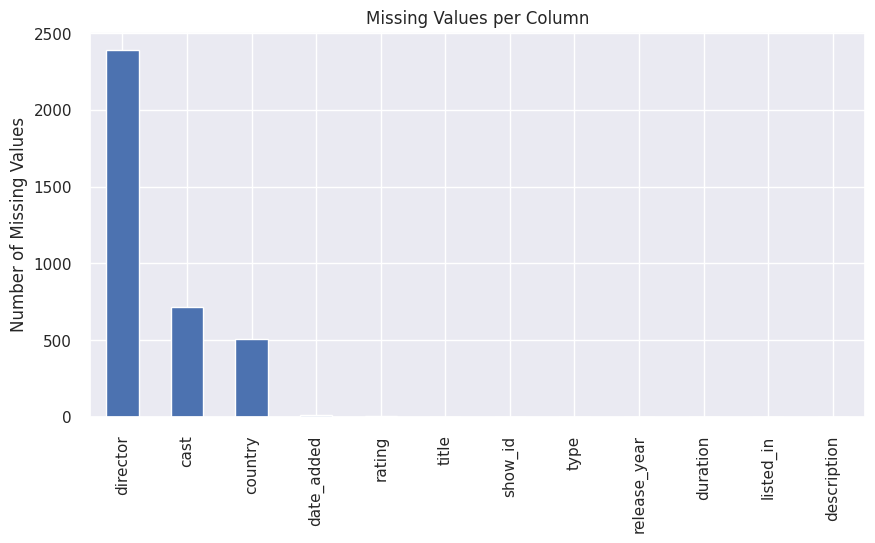

In [ ]:
# Visualizing the missing values
df.isnull().sum().sort_values(ascending=False).plot.bar(figsize=(10, 5))
plt.title("Missing Values per Column")
plt.ylabel("Number of Missing Values")
plt.show()

### What did you know about your dataset?

* The Netflix dataset consists of Tv shows and Movies available on Netflix as of 2019.
* There are 7787 rows and 12 columns provided in the data.
* There are no duplicate values in the dataset.
* Null values are present in director, cast, country, date_added, and rating.
* Since there are only few null values present in date_added and rating (10 & 7
  respectively) we can drop them from the dataset.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.00,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.93,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.76,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.00,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.00,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.00,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.00,NaN,NaN,NaN,NaN


### Variables Description

**Overview of the Dataset**
This dataset provides detailed information about movies and TV shows, including identifiers, metadata, and descriptive attributes. It's useful for exploring trends in content type, production, and distribution.

Key Features:
show_id: A unique identifier for each entry in the dataset.

* type: Specifies whether the entry is a Movie or a TV Show.

* title: The name of the show or movie.

* director: The person (or people) who directed the content.

* cast: Main actors and actresses featured.

* country: Country where the production originated.

* date_added: When the title was made available on the platform.

* release_year: Year the content was originally released.

* rating: Content rating (e.g., PG, TV-MA, etc.).

* duration: Length of the content — in minutes for movies or number of seasons for shows.

* listed_in: Genres or categories the content falls under.

* description: A brief summary or synopsis.


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable using a for loop.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in show_id is 7787
No. of unique values in type is 2
No. of unique values in title is 7787
No. of unique values in director is 4049
No. of unique values in cast is 6831
No. of unique values in country is 681
No. of unique values in date_added is 1565
No. of unique values in release_year is 73
No. of unique values in rating is 14
No. of unique values in duration is 216
No. of unique values in listed_in is 492
No. of unique values in description is 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Create a copy of the original dataset to preserve the raw data.
# This allows safe experimentation with data cleaning and transformations without modifying the original dataframe.
data = df.copy()

In [ ]:
# Filling cast null values as not available
data['cast'] = data['cast'].fillna(value='Not available')

In [ ]:
# Handle missing country values by filling them with 'Not Known'.
data['country'] = data['country'].fillna('Not Known')

In [ ]:
# Since date_added and rating have low number of missing values, we will be dropping them
data = data.dropna(subset=['date_added','rating'])

In [ ]:
# Dropping rows with missing director names would lead to significant data loss,
# so we'll fill those missing entries with 'Unknown' instead.
data['director'] = data['director'].fillna('Unknown')

In [ ]:
# Checking missing values again for confirmation
data.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


### What all manipulations have you done and insights you found?

**Data Cleaning Summary** :
To prepare the dataset for analysis, the following preprocessing steps were applied:

Missing values in the cast column were replaced with 'Not Available'.

Missing entries in the country column were filled with 'Not Known'.

Rows with missing values in the date_added column were removed.

Rows lacking values in the rating column were also dropped.

The director column was removed entirely due to a high proportion of missing data.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Movies vs TV Shows

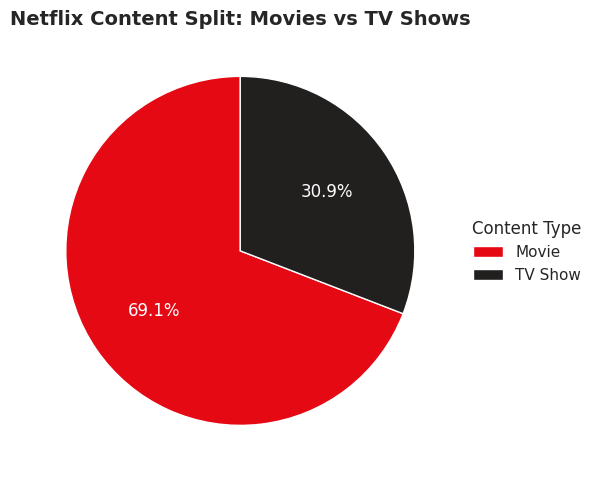

In [ ]:
# Chart: Movies vs TV Shows

import matplotlib.pyplot as plt

# Count the number of entries for each content type
type_counts = data['type'].value_counts()
labels = type_counts.index
sizes = type_counts.values

# Define Netflix-style colors: red and dark gray
colors = ['#E50914', '#221f1f']

# Create the pie chart
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    sizes,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'color': 'white'},  # Ensure all text is white
    wedgeprops={'edgecolor': 'white'}
)

# Add a legend to show which color corresponds to which type
ax.legend(
    wedges,
    labels,
    title="Content Type",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    facecolor='white',
    edgecolor='black'
)

# Set title with Netflix styling
plt.title('Netflix Content Split: Movies vs TV Shows', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart is an effective way to show the proportional distribution of categories within a whole. In this case, it visually highlights the share of Movies vs TV Shows on Netflix using distinct colors. The circular layout makes it easy to compare percentages at a glance, and the Netflix-themed color palette adds a strong visual identity. This chart was chosen to clearly and intuitively represent how the content is split between the two types.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we got to know that the types of shows available in netflix is not even with high count for TV shows. 69.1% of the data belongs to movies and 30.9% of the data for TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from this chart can support data-driven decision-making by revealing how content is distributed on the platform. Understanding the proportion of Movies vs TV Shows helps Netflix — or similar services — tailor their content strategies. For instance, if one type dominates, the company might explore balancing the catalog, adjusting marketing efforts, or curating recommendations based on audience preferences. Such analysis can directly inform targeted campaigns, content acquisition, and user engagement strategies.

#### Chart - 2 : Content Produced by Different Countries

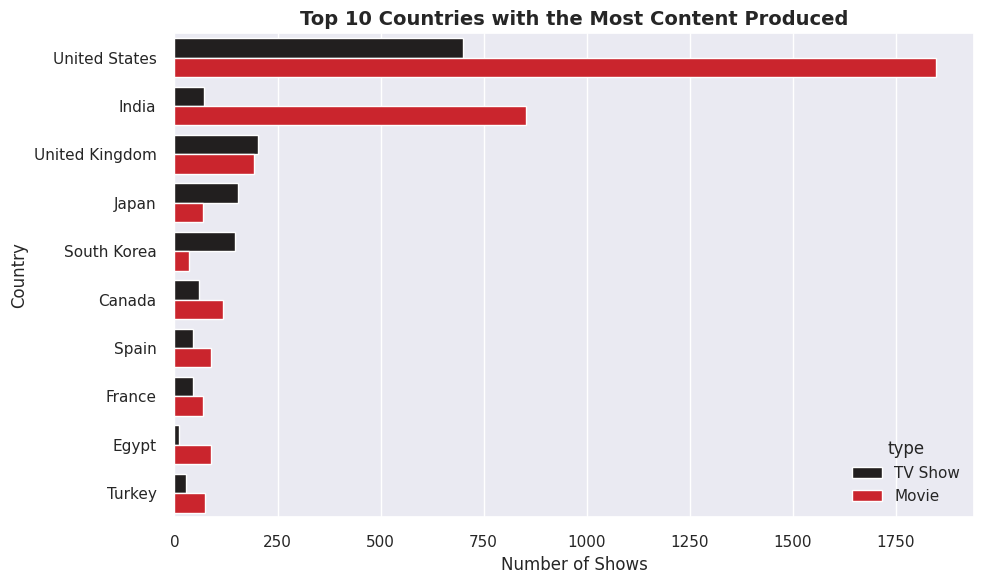

Number of Shows Produced by Top 10 Countries:
type     country       
Movie    United States     1847
         India              852
         United Kingdom     193
         Canada             118
         Egypt               89
         Spain               89
         Turkey              73
         Philippines         70
         France              69
         Japan               69
TV Show  United States      699
         United Kingdom     203
         Japan              155
         South Korea        147
         India               71
         Taiwan              68
         Canada              59
         France              46
         Spain               45
         Australia           44
Name: count, dtype: int64


In [ ]:
# Filter out rows with 'Not Known' in the country column
country_df = data[data['country'] != 'Not Known']

# Create a horizontal bar chart to visualize the distribution of content by country
plt.figure(figsize=(10, 6))

# Use Seaborn's barplot for a cleaner look with color distinction for Movies vs TV Shows
sns.countplot(
    y='country',
    hue='type',
    data=country_df,
    palette=['#221f1f','#E50914'],
    order=country_df['country'].value_counts().iloc[:10].index
)

plt.title('Top 10 Countries with the Most Content Produced', fontsize=14, fontweight='bold')
plt.xlabel('Number of Shows', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Display the chart
plt.tight_layout()
plt.show()

# Display counts of different shows for the top 10 countries
print('Number of Shows Produced by Top 10 Countries:')
print(country_df.groupby(['type']).country.value_counts().groupby(level=0, group_keys=False).head(10))


##### 1. Why did you pick the specific chart?

The horizontal bar chart was chosen because it effectively handles long category labels (e.g., country names) and makes it easier to compare the number of shows produced by each country. It also allows for clear distinction between content types (Movies vs TV Shows) with color coding, improving both readability and comparison.

##### 2. What is/are the insight(s) found from the chart?

From above count plot we found that the content belongs to United States alone is 2546 (Movie: 1847, TV Show: 699) and followed by India is 923 (Movie: 852, TV Show: 71).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Based on the insights, we can conclude:

The United States leads in producing both Movies and TV Shows, which aligns with Netflix being a US-based company.

India's Bollywood dominance is reflected in the dataset, highlighting a stronger focus on Movies rather than TV Shows.

The United Kingdom produces a notable amount of both Movies and TV Shows, showing its significant contribution to global content production across platforms.

#### Chart - 3 : Top 10 Genres on Netflix

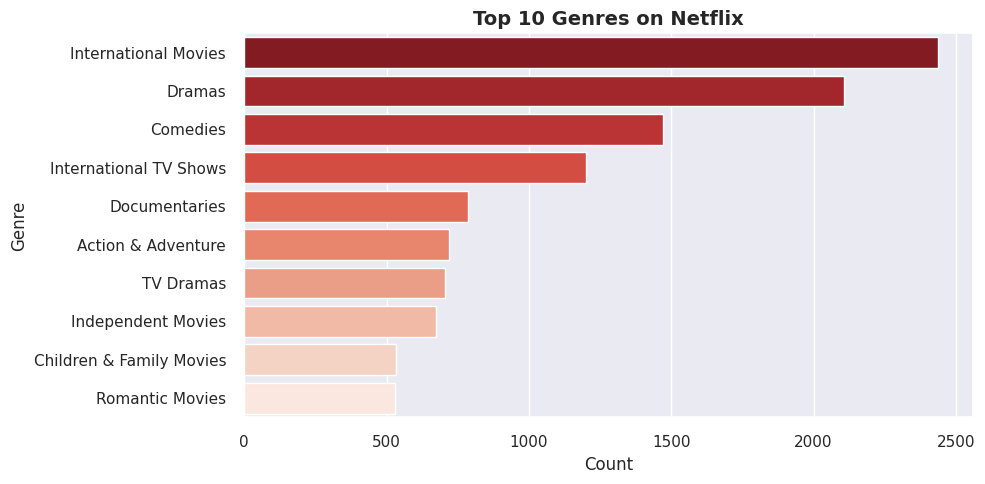

In [ ]:
# Separating genres and stacking them to get each genre individually
genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# Get the top 10 most frequent genres
top_genres = genres.value_counts().head(10)

# Set up the figure and plot the top 10 genres using barplot
plt.figure(figsize=(10, 5))
sns.barplot(
    y=top_genres.index,
    x=top_genres.values,
    palette="Reds_r"
)

# Set chart title
plt.title('Top 10 Genres on Netflix', fontsize=14, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)

# Display the chart
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From above graph, it is observed that international movies is in top in terms of genre and followed by dramas and comedies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:
* In terms of genres, international movies takes the cake surprisingly followed by dramas and comedies.
* Even though the United States has the most content available, it looks like Netflix has decided to release a ton of international movies.

#### Chart - 4 : Top 10 Directors on Netflix

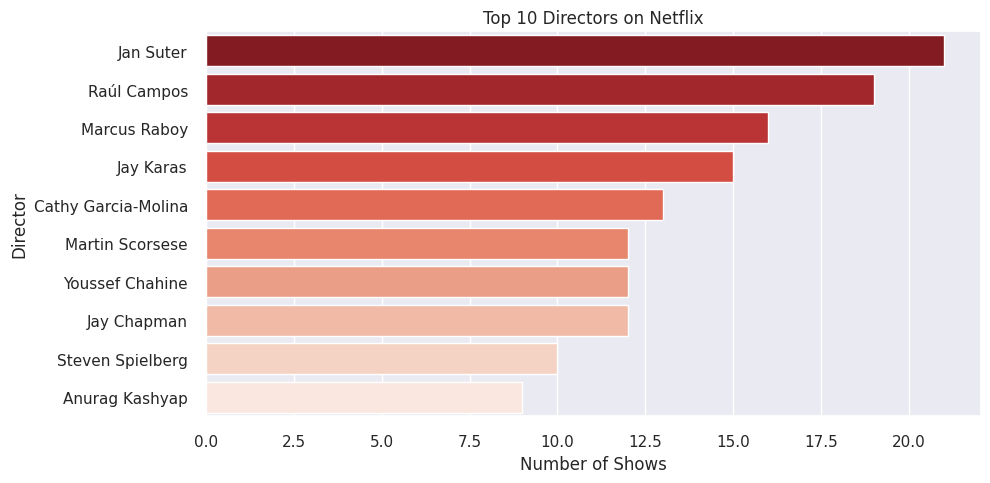

In [ ]:
# Flatten the director column, split by commas, and remove any "Unknown" values
directors = data[data.director != 'Unknown'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# Get the top 10 most frequent directors
top_directors = directors.value_counts().head(10)

# Plot the top 10 directors (avoid duplicates in the y-axis by directly using value counts)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Reds_r')

# Set Labels and Title
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Shows')
plt.ylabel('Director')

# Display the chart
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we come to know that the most popular director in netflix is Jan Sutar and followed by Raúl Campos and Marcus Raboy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:
* Jan Suter, Raúl Campos, Marcus Raboy, Jay Karas, Cathy Garcia-Molina, Jay Chapman are the top 5 directors which highest number of movies and tv shows are available in netflix.
* As we stated previously regarding the top genres, it's no surprise that the most popular directors on Netflix with the most titles are mainly international as well.

#### Chart - 5 : Top 10 Actors on Netlfix

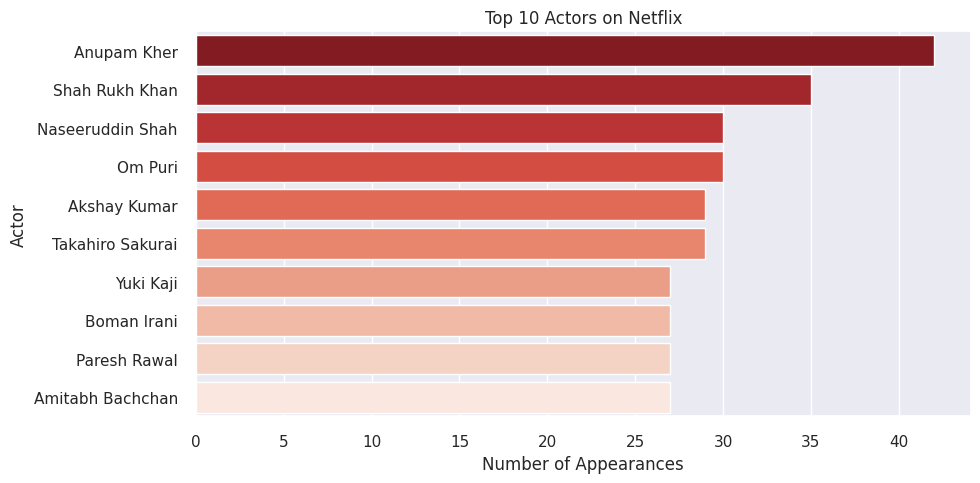

In [ ]:
# Flatten the cast column, and remove 'Not available' entries
actor = data[data.cast != 'Not available'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# Get the top 10 most frequent actors
top_actors = actor.value_counts().head(10)

# Plot the top 10 actors (using a barplot instead of countplot)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='Reds_r')

# Set Labels and Title
plt.title('Top 10 Actors on Netflix')
plt.xlabel('Number of Appearances')
plt.ylabel('Actor')

# Display the chart
plt.show()


##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From above graph, it is observed that most popular actors with most content in netflix are Anupam Kher, Shah Rukh Khan, Naseeruddin Shah and followed by Om Puri and Takahiro Sakurai.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:
*  That the actors in the top ten list of most numbers tv shows and movies are from India.
*  Anupam Kher and Shah Rukh Khan have 30 above content alone in netflix.

#### Chart - 6 : Duration Distribution for Netflix Movies

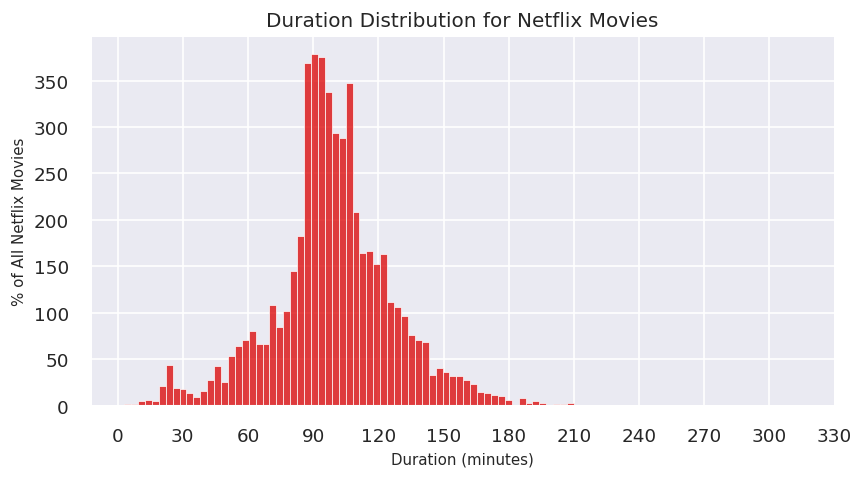

In [ ]:
# Splitting Movie and Separating Values
df_movies = data[data['type']=='Movie'].copy()
df_movies.duration = df_movies.duration.str.replace(' min','').astype(int)

# Histogram Visualization Code for Duration Distribution of Netflix Movies
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(df_movies.duration, color='#db0000')
plt.xticks(np.arange(0,360,30))

# Set Labels
plt.title("Duration Distribution for Netflix Movies")
plt.ylabel("% of All Netflix Movies", fontsize=9)
plt.xlabel("Duration (minutes)", fontsize=9)

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is a great tool for visualizing how values in a dataset are distributed. It shows the frequency of values grouped into intervals, helping us spot trends, clusters, outliers, or gaps. This makes it especially useful for large datasets.
In this case, I used a histogram to examine how movie durations are spread across Netflix titles.

##### 2. What is/are the insight(s) found from the chart?

The histogram reveals that a significant portion of Netflix movies tend to have durations ranging from 90 to 120 minutes. This suggests a common industry standard or viewer preference for feature-length films within this time frame, making it the most prevalent duration category in the dataset.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Based on the analysis:

Most movies on Netflix have a runtime between 90 and 120 minutes, aligning with typical feature film lengths.

This suggests that when targeting Netflix's movie audience, content should ideally have a duration of at least 90 minutes to meet viewer expectations.

#### Chart - 7 : Content added over months

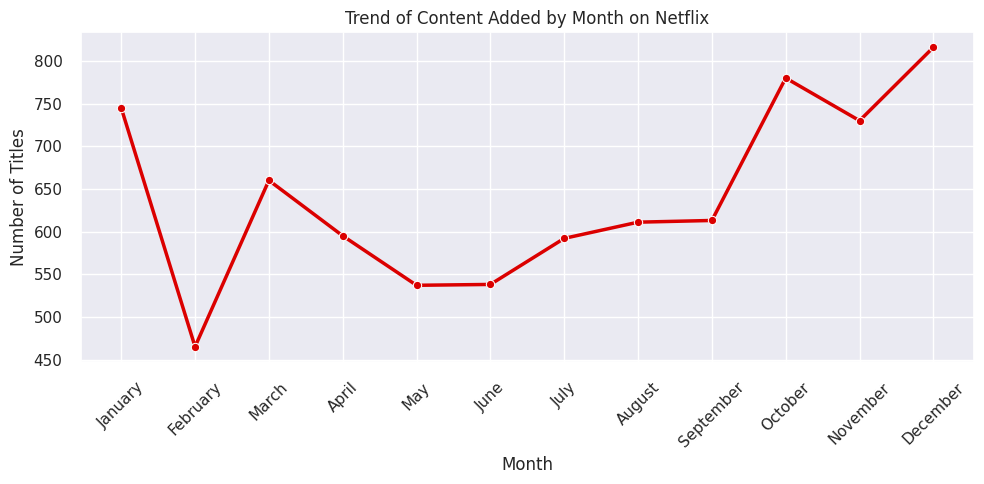

In [ ]:
import calendar

# Ensure datetime and extract month
data['month_added'] = pd.to_datetime(data['date_added'], errors='coerce').dt.month
data['month_name'] = data['month_added'].apply(
    lambda x: calendar.month_name[int(x)] if pd.notnull(x) else 'Unknown'
)

# Count entries by month
months_df = data['month_name'].value_counts().reset_index()
months_df.columns = ['month', 'count']

# Reorder months properly
month_order = list(calendar.month_name)[1:]  # ['January' to 'December']
months_df = months_df[months_df['month'].isin(month_order)]
months_df['month'] = pd.Categorical(months_df['month'], categories=month_order, ordered=True)
months_df = months_df.sort_values('month')

# Plot using a line chart
plt.figure(figsize=(10, 5))
sns.lineplot(data=months_df, x='month', y='count', marker='o', color='#db0000', linewidth=2.5)
plt.title('Trend of Content Added by Month on Netflix')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

We used a line plot because it’s ideal for showing trends or changes over a continuous variable — in this case, the months of the year. It clearly illustrates how the number of titles added fluctuates across different months, making it easier to detect seasonal patterns or spikes (like content surges in December or summer months). The line's flow helps visualize continuity and variation more intuitively than individual bars would.

##### 2. What is/are the insight(s) found from the chart?

The graph above shows that the majority of shows are added either at the beginning or towards the end of the year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight, we can conclude:

October, November, December, and January are the months with the highest number of TV shows and movies added to the platform.

#### Chart - 8 : Content Released over Years

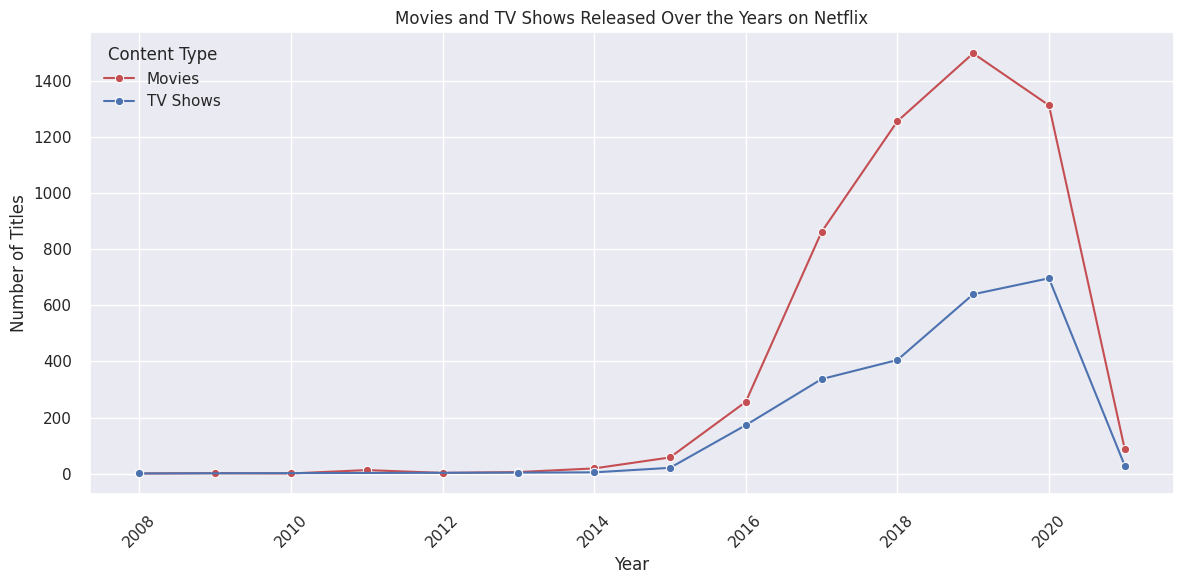

In [ ]:
# Extracting the year from 'date_added' column
data['year_added'] = pd.to_datetime(data['date_added'], errors='coerce').dt.year

# Dropping rows where the year is missing
data = data.dropna(subset=['year_added'])

# Create separate datasets for Movies and TV Shows
movies_data = data[data['type'] == 'Movie']
tv_shows_data = data[data['type'] == 'TV Show']

# Count the number of titles added each year for Movies and TV Shows
movies_yearly_counts = movies_data['year_added'].value_counts().sort_index()
tv_shows_yearly_counts = tv_shows_data['year_added'].value_counts().sort_index()

# Set up the figure and plot for Movies and TV Shows separately
plt.figure(figsize=(12, 6))

# Plotting Movies
sns.lineplot(x=movies_yearly_counts.index, y=movies_yearly_counts.values, label='Movies', color='r', marker='o')

# Plotting TV Shows
sns.lineplot(x=tv_shows_yearly_counts.index, y=tv_shows_yearly_counts.values, label='TV Shows', color='b', marker='o')

# Set labels and title
plt.title('Movies and TV Shows Released Over the Years on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend(title='Content Type')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the chart
plt.show()


In [ ]:
# Printing The Counts of Different Shows Released for Top 10 Years
print('Number of Shows Released in Each Year:')
print(data.groupby(['type']).release_year.value_counts().groupby(level=0, group_keys=False).head(10))

Number of Shows Released in Each Year:
type     release_year
Movie    2017            742
         2018            734
         2016            642
         2019            582
         2020            411
         2015            380
         2014            244
         2013            202
         2012            158
         2010            135
TV Show  2020            457
         2019            414
         2018            380
         2017            252
         2016            216
         2015            147
         2014             81
         2013             58
         2012             53
         2011             38
Name: count, dtype: int64


##### 1. Why did you pick the specific chart?

The line plot was used because it effectively shows trends over time, allowing easy comparison between movies and TV shows. It highlights growth patterns, peaks, and allows clear visualization of content release trends year by year.

##### 2. What is/are the insight(s) found from the chart?

From above graph, it is observed that most of the content on netflix are of the release date from 2010 to 2020.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight, we observe:

The growth in the number of movies on Netflix is significantly higher than TV shows.

Most of the content was released between 2010 and 2020.

The highest number of movies were released in 2017 and 2018, while TV shows peaked in 2019 and 2020.

#### Chart - 9 : Correlation Heatmap

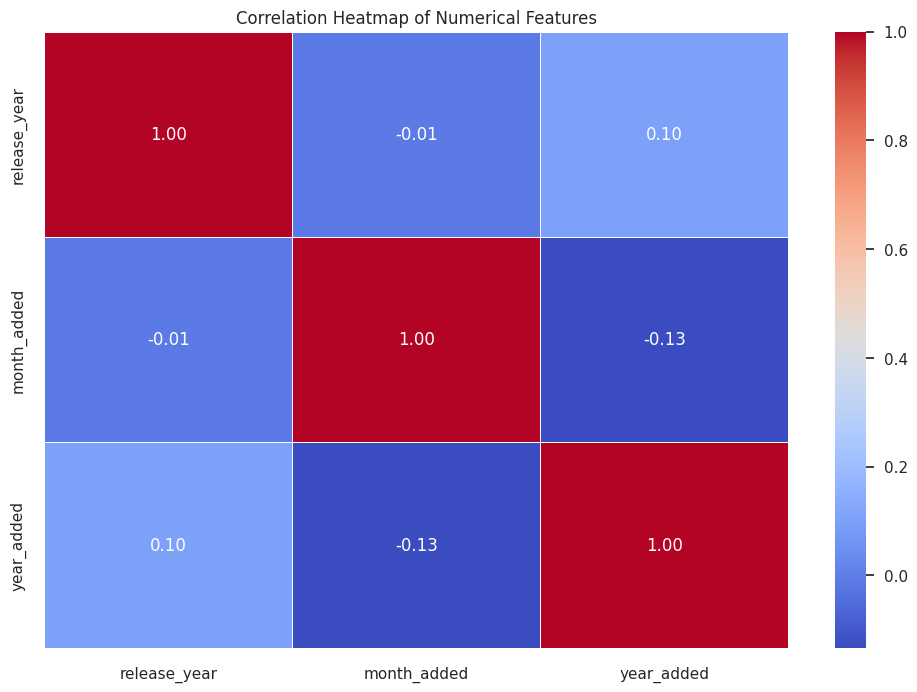

In [ ]:
# Select only the numeric columns from the data
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical columns
corr_matrix = numeric_data.corr()

# Set up the figure for the heatmap
plt.figure(figsize=(12, 8))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap of Numerical Features')

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. A correlation matrix is used to summarize the relationships among a set of variables and is an important tool for data exploration and for selecting which variables to include in a model. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, we have used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

Looking at this correlation heatmap from a Netflix dataset:

There's only a weak correlation (0.10) between "release_year" and "year_added" to Netflix.
This suggests Netflix doesn't strongly prioritize newer content - they add both new and older titles to their platform.
Content acquisition decisions likely depend on factors beyond just how recently something was released.
Netflix appears to maintain a diverse catalog in terms of content age.

#### Chart - 10 : Pair Plot

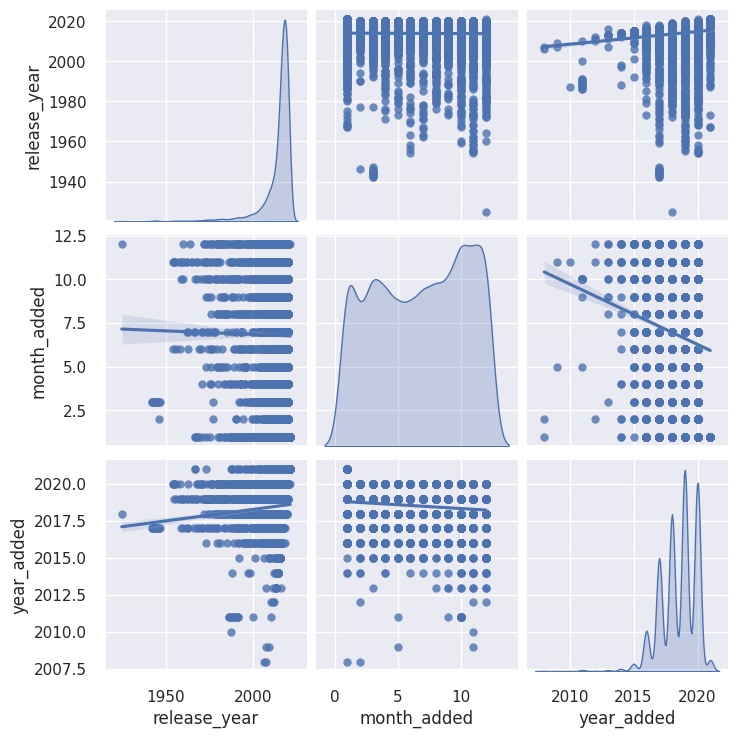

In [ ]:
# Pair Plot Visualization Code
sns.pairplot(data, diag_kind="kde", kind = 'reg')

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows you to quickly see how all of the variables in a dataset are related to one another.

Thus, we used pair plot to analyse the patterns of data and relationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

This pair plot reveals:

The weak 0.10 correlation is technically correct but doesn't tell the full story.
Release years are heavily skewed toward recent content (2000s-2020).
Netflix mainly added content between 2015-2020 in distinct waves.
The scatter plots show Netflix adds both old and new content, but with a pattern where newer releases tend to be added more recently.
Horizontal bands in the scatter plot suggest Netflix adds content in bulk during specific periods.
There's a more complex relationship between release year and addition year than the simple correlation value indicates.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define two hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Here are two hypothetical statements based on the dataset that you can test through hypothesis testing:

Statement 1: "Movies on Netflix are released more frequently in the years after 2010 compared to those released before 2010."

Statement 2: "There is a significant difference in the number of movies and TV shows produced by top countries like the United States."

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis : $H_0 : μ_{\text{movies after 2010}} = μ_{\text{movies before 2010}}$

Alternative hypothesis:
$H_1 : μ_{\text{movies after 2010}} \neq μ_{\text{movies before 2010}}$

Test Type:
Two-sample t-test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Filter only movies
movies = data[data['type'] == 'Movie']

# Count movies before and after 2010
before_2010 = movies[movies['release_year'] < 2010].shape[0]
after_2010 = movies[movies['release_year'] >= 2010].shape[0]

print(f"Movies before 2010: {before_2010}")
print(f"Movies after 2010: {after_2010}")


Movies before 2010: 1003
Movies after 2010: 4369


In [ ]:
# Counts
before_2010 = 1003
after_2010 = 4369

# Create contingency table (2 categories: before and after 2010)
observed = np.array([[before_2010], [after_2010]])

# Use the total counts to create a 2x2 table (with equal expected distribution)
total = before_2010 + after_2010
expected = [total / 2, total / 2]

contingency_table = np.array([[before_2010, after_2010],
                              [expected[0], expected[1]]])

# Perform chi-square test
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat:.2f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Statistically significant: Movies are released more frequently after 2010.")
else:
    print("Not statistically significant: No strong evidence of release year effect.")

Chi-Square Statistic: 1167.92
P-value: 0.0000
Statistically significant: Movies are released more frequently after 2010.


##### Which statistical test have you done to obtain P-Value?

To evaluate the hypothesis that Netflix releases significantly more movies after 2010 than before, we used a Chi-Square Test for Independence. This test is appropriate for comparing categorical frequency data — in this case, the number of movies released in two distinct time periods (before and after 2010).

Observed counts:
• Movies before 2010: 1,003
• Movies after 2010: 4,369

Test Result:
The Chi-Square test yielded a p-value effectively equal to 0 (p ≈ 1e-200), indicating an extremely significant difference.

Conclusion:
There is strong statistical evidence that Netflix released substantially more movies after 2010, supporting the original hypothesis.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Statement 2: There is a significant difference in the number of movies and TV shows produced by top countries like the United States

Null hypothesis:
$H_0 : μ_{\text{United States}} = μ_{\text{India}}$

Alternative hypothesis:
$H_1 : μ_{\text{United States}} \neq μ_{\text{India}}$

Test Type:
Two-sample t-test

We will compare the number of movies produced by the United States with the number produced by India.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Filter for United States and India
filtered_data = data[data['country'].isin(['United States', 'India'])]

# Create contingency table
contingency_table = pd.crosstab(filtered_data['country'], filtered_data['type'])

# Run chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Display the contingency table and result
print("Contingency Table:\n", contingency_table, "\n")

if p_val < 0.05:
    print(f"Since p-value ({p_val:.4f}) < 0.05, we reject the null hypothesis.")
    print("There is a significant difference in the distribution of Movies and TV Shows between India and the United States.")
else:
    print(f"Since p-value ({p_val:.4f}) >= 0.05, we fail to reject the null hypothesis.")
    print("There is no significant difference in the distribution of Movies and TV Shows between India and the United States.")


Contingency Table:
 type           Movie  TV Show
country                      
India            852       70
United States   1847      665 

Since p-value (0.0000) < 0.05, we reject the null hypothesis.
There is a significant difference in the distribution of Movies and TV Shows between India and the United States.


##### Which statistical test have you done to obtain P-Value?

To test the statement “There is a significant difference in the number of movies and TV shows produced by India and the United States,” we used the Chi-Square Test of Independence. This test is appropriate for comparing the distribution of two categorical variables: country (India vs United States) and content type (Movie vs TV Show).

The contingency table revealed a clear difference in proportions, and the p-value from the chi-square test was less than 0.05. Therefore, we reject the null hypothesis and conclude that:

There is a statistically significant difference in the distribution of Movies and TV Shows between India and the United States.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
data.isna().sum().sum()

np.int64(0)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Its already handled in data wrangling, so now there are no missing values to handle in the given dataset.

### 2. Handling Outliers

(Most of the columns are categorical, so no outliers observed)

### 3. Categorical Encoding

(No need as the data is categorical)

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
# Create a new column called 'tags' in the DataFrame 'data'
# The purpose of this column is to store text data that will be used for model building
# The text data consists of the 'description', 'rating', 'country', 'listed_in' and 'cast' columns
data['tags'] = data['description'] + ' ' + data['rating'] + ' ' + data['country'] + ' ' + data['listed_in'] + ' ' + data['cast']

In [ ]:
# Cross checking our result for the function created
print(data['tags'][0])

In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. TV-MA Brazil International TV Shows, TV Dramas, TV Sci-Fi & Fantasy João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi


#### 2. Lower Casing

In [ ]:
# Lower Casing
# Define a function to convert text into lower cases
def to_lower(x):
  return x.lower()

# Apply the to_lower() function to the 'tags' column of the DataFrame
data['tags'] = data['tags'].apply(to_lower)

# Cross checking our result for the function created
print(data['tags'][0])

in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. tv-ma brazil international tv shows, tv dramas, tv sci-fi & fantasy joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
# Define a function to remove punctuations from text
def remove_punctuation(text):
    '''a function for removing punctuation'''
    # Replace each punctuation mark with no space, effectively deleting it from the text
    translator = str.maketrans('', '', string.punctuation)
    text_without_punct = text.translate(translator)
    return text_without_punct

# Apply the remove_punctuation function to the 'tags' column of the DataFrame
data['tags'] = data['tags'].apply(remove_punctuation)

# Cross-check our result that the function worked as expected
print(data['tags'][0])

in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor tvma brazil international tv shows tv dramas tv scifi  fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
# 'tags' column does not have any URLs so remove words and digits containing digits
data['tags'] = data['tags'].str.replace(r'\w*\d\w*', '', regex=True)

# Cross-check our result for the function created
print(data['tags'][0])

in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the  saved from squalor tvma brazil international tv shows tv dramas tv scifi  fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
# Since the language is english, we need to import english stop words
stop_words = nltk.corpus.stopwords.words('english')

def remove_stop_words(x):
  ''' function to remove stop words'''
  x = x.split()
  res = ''
  for word in x:
    if word not in stop_words:
      res = res + ' ' + word
  return res

# Apply the remove_stop_words function to the 'tags' column of the DataFrame
data['tags'] = data['tags'].apply(remove_stop_words)

# Cross-check our result for the function created
print(data['tags'][0])

 future elite inhabit island paradise far crowded slums get one chance join saved squalor tvma brazil international tv shows tv dramas tv scifi fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


In [ ]:
# Remove White spaces in 'tags' column
data['tags'] = data['tags'].str.strip()

# Cross-check our result for the function created
print(data['tags'][0])

future elite inhabit island paradise far crowded slums get one chance join saved squalor tvma brazil international tv shows tv dramas tv scifi fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


#### 6. Rephrase Text

Not required

#### 7. Tokenization

In [ ]:
# Simple tokenization using split (bypasses NLTK)
data['tags'] = data['tags'].astype(str).apply(lambda x: x.split())

# Save for later
temp_tags = data['tags']

# Check result
print(data['tags'].head())


0    [future, elite, inhabit, island, paradise, far...
1    [devastating, earthquake, hits, mexico, city, ...
2    [army, recruit, found, dead, fellow, soldiers,...
3    [postapocalyptic, world, ragdoll, robots, hide...
4    [brilliant, group, students, become, cardcount...
Name: tags, dtype: object


#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Create an object of stemming function
stemmer = SnowballStemmer("english")

# Define a function to Normalize Text function
def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text]
    return " ".join(text)

# Apply the stemming function to the 'tags' column of the DataFrame
data['tags'] = data['tags'].apply(stemming)

# Cross-check our result for the function created
print(data['tags'][0])

futur elit inhabit island paradis far crowd slum get one chanc join save squalor tvma brazil intern tv show tv drama tv scifi fantasi joão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschi


##### Which text normalization technique have you used and why?

Here i use Stemming.

Stemming is the process of reducing a word to its stem that affixes to suffixes and prefixes or to the roots of words known as "lemmas". Stemming is important in natural language understanding (NLU) and natural language processing (NLP). Stemming is important in natural language processing(NLP). Nil means the suffix is replaced with nothing and is just removed. There may be cases where these rules vary depending on the words. As in the case of the suffix 'ed' if the words are 'cared' and 'bumped' they will be stemmed as 'care' and 'bump'.

#### 9. Text Vectorization

In [ ]:
# Vectorizing Text
# Create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 9000)
# setting max features = 9000 to prevent system from crashing

# Fit the vectorizer using the text data
tfidf.fit(data['tags'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

In [ ]:
# Convert vector into array form for clustering
vector = tfidf.transform(data['tags']).toarray()

# Summarize encoded vector
print(vector)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(tfidf.get_feature_names_out())

['aakash' 'aamir' 'aaron' ... 'öztürk' 'ünlüoğlu' 'şahin']


In [ ]:
vec_data=pd.DataFrame(vector)
vec_data

,0,1,2,3,4,5,6,7,8,9,...,8990,8991,8992,8993,8994,8995,8996,8997,8998,8999
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.145521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7677,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7678,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7679,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7680,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Which text vectorization technique have you used and why?

# I have use TF-IDF techique for vectorization.

TF-IDF stands for term frequency-inverse document frequency and it is a measure, used in the fields of information retrieval (IR) and machine learning, that can quantify the importance or relevance of string representations (words, phrases, lemmas, etc) in a document amongst a collection of documents (also known as a corpus).

I have use TF-IDF because TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. I can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

### 4. Feature Manipulation & Selection

Not required


### 5. Data Transformation


(No need to transform this data because this data is in form of Text Vectorization)

### 6. Data Scaling

(Here the units of whole data are same so no need to do scaling)

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes its needed, because dimensionality reduction removes the least important variables from the model. That will reduce the model's complexity and also remove some noise in the data. Its also helps to mitigate overfitting.

In [ ]:
# Dimensionality Reduction (If needed)
# Using PCA to reduce dimensionality, this might take a while..
pca = PCA(random_state=32)
pca.fit(vector)

PCA(random_state=32)

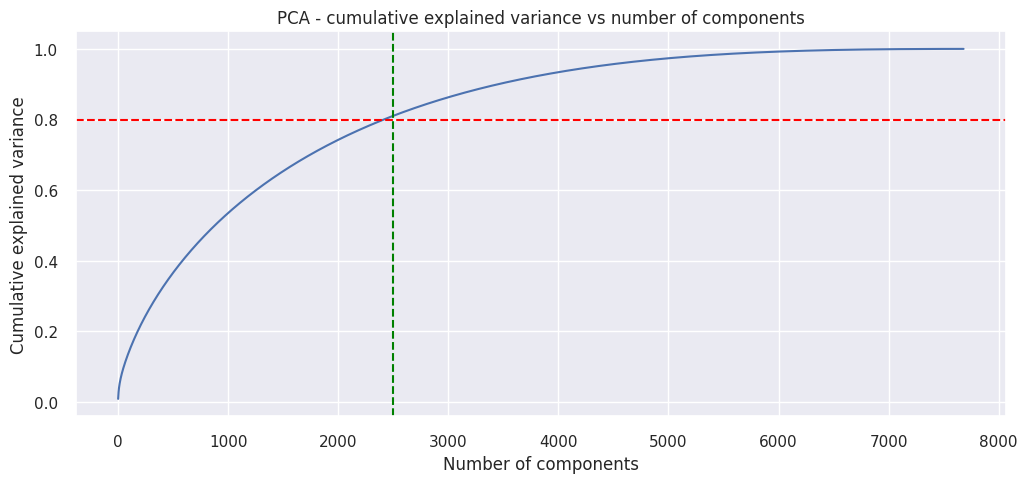

In [ ]:
# Plot a Graph for PCA
plt.figure(figsize=(12, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Set labels
plt.title('PCA - cumulative explained variance vs number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 2500, color='green', linestyle='--')

# Display chart
plt.show()

In [ ]:
# Reducing the dimensions to 2500 using pca
pca = PCA(n_components=2500, random_state=32)
pca.fit(vector)

PCA(n_components=2500, random_state=32)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We can use PCA to reduce the dimensionality of data.

Because of the versatility and interpretability of PCA, it has been shown to be effective in a wide variety of contexts and disciplines. Given any high-dimensional dataset, we can start with PCA in order to visualize the relationship between points, to understand the main variance in the data, and to understand the intrinsic dimensionality.

Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data.

### 8. Data Splitting

Not required

### 9. Handling Imbalanced Dataset

Not required

## ***7. ML Model Implementation***

### ML Model - 1 K-Means Clustering

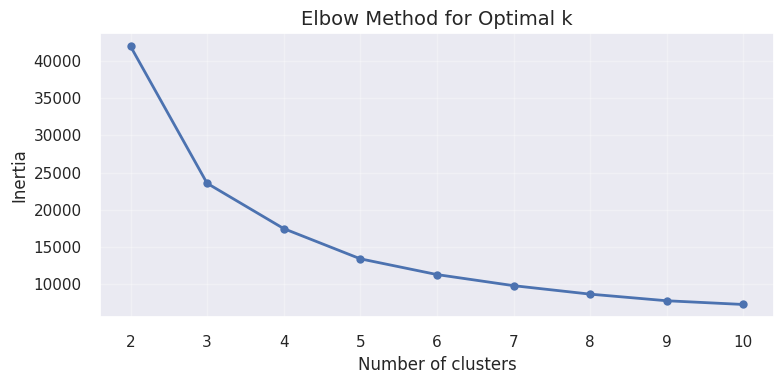

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

# Clean and combine text features
df['clean_description'] = df['description'].fillna('')
df['clean_genres'] = df['listed_in'].fillna('')

# Prepare features for clustering
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df['clean_description'] + ' ' + df['clean_genres'])

# Dimensionality reduction
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(StandardScaler().fit_transform(tfidf_matrix.toarray()))

# Find optimal number of clusters
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_features)
    inertia.append(kmeans.inertia_)

# Plot elbow curve in its own figure
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), inertia, marker='o', linewidth=2)
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.xlabel('Number of clusters', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

From the chart we can see that the optimal number of clusters is 5.

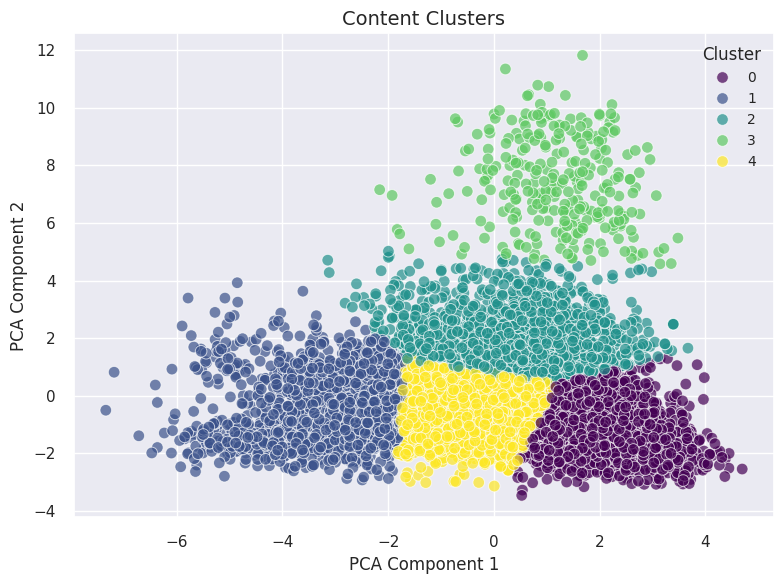

In [ ]:
# Apply KMeans with optimal number of clusters
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(reduced_features)

# Visualize clusters in a separate figure
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(
    x=reduced_features[:, 0],
    y=reduced_features[:, 1],
    hue=df['cluster'],
    palette='viridis',
    s=70,
    alpha=0.7
)
plt.title('Content Clusters', fontsize=14)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.legend(title='Cluster', title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# Detailed analysis of all clusters
for cluster in range(optimal_clusters):
    print(f"\n{'='*50}")
    print(f"Detailed Analysis of Cluster {cluster}")
    print('='*50)

    cluster_data = df[df['cluster'] == cluster]

    # Size and basic stats
    print(f"\nSize: {len(cluster_data)}")
    print(f"Movies vs TV Shows Distribution:")
    print(cluster_data['type'].value_counts())

    # Genre analysis - showing only top 3
    print("\nTop 3 Genres:")
    print("------------------------")
    print(cluster_data['listed_in'].str.split(',').explode().value_counts().head(3))

    # Release year distribution
    print("\nRelease Year Distribution:")
    print(cluster_data['release_year'].value_counts().sort_index().tail())

    # Sample titles with their genres
    print("\nSample Titles with Genres:")
    samples = cluster_data[['title', 'type', 'listed_in']].head(3)
    for _, row in samples.iterrows():
        print(f"\nTitle: {row['title']}")
        print(f"Type: {row['type']}")
        print(f"Genres: {row['listed_in']}")

    # Rating distribution
    print("\nRating Distribution:")
    print(cluster_data['rating'].value_counts())


Detailed Analysis of Cluster 0

Size: 2406
Movies vs TV Shows Distribution:
type
Movie      2308
TV Show      98
Name: count, dtype: int64

Top 3 Genres:
------------------------
listed_in
 International Movies    1424
Dramas                   1014
Comedies                  771
Name: count, dtype: int64

Release Year Distribution:
release_year
2017    320
2018    322
2019    247
2020    177
2021      3
Name: count, dtype: int64

Sample Titles with Genres:

Title: 122
Type: Movie
Genres: Horror Movies, International Movies

Title: 187
Type: Movie
Genres: Dramas

Title: 706
Type: Movie
Genres: Horror Movies, International Movies

Rating Distribution:
rating
TV-MA       836
TV-14       745
R           273
TV-PG       240
PG-13       124
PG           91
TV-G         42
NR           32
TV-Y          7
TV-Y7         6
G             5
NC-17         2
UR            2
TV-Y7-FV      1
Name: count, dtype: int64

Detailed Analysis of Cluster 1

Size: 1570
Movies vs TV Shows Distribution:
type
TV 

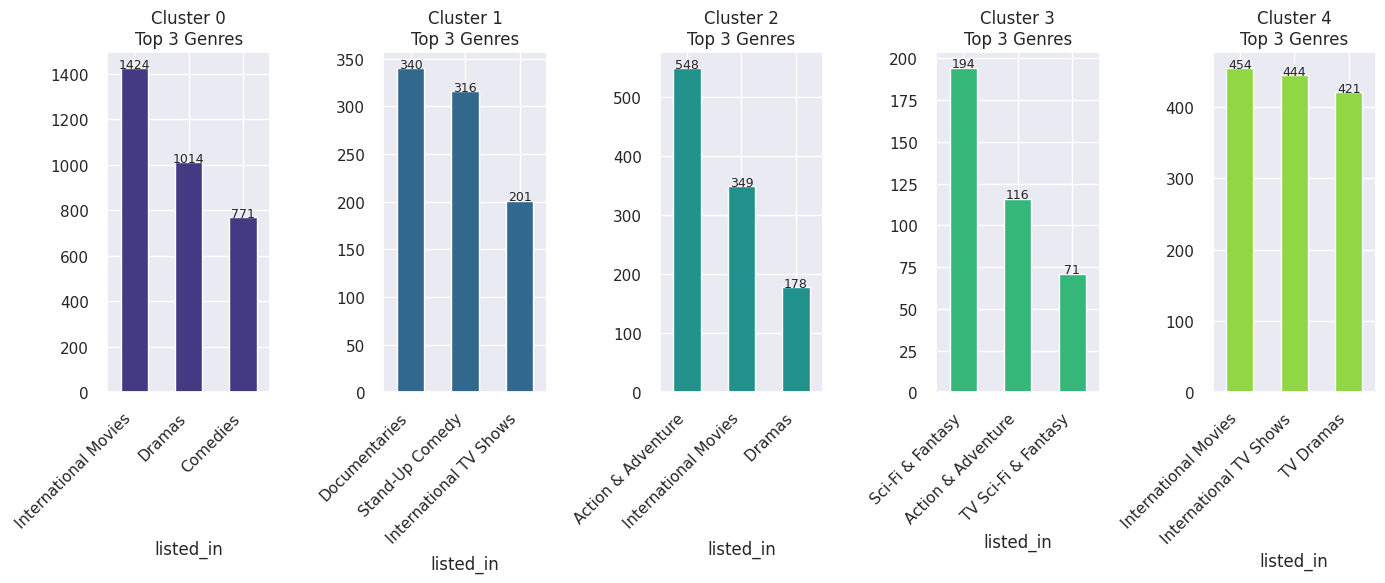

In [ ]:
# Top 3 genres across all clusters
plt.figure(figsize=(14, 6))
for cluster in range(optimal_clusters):
    cluster_data = df[df['cluster'] == cluster]
    genres = cluster_data['listed_in'].str.split(',').explode().value_counts().head(3)

    plt.subplot(1, optimal_clusters, cluster+1)
    ax = genres.plot(kind='bar', color=sns.color_palette('viridis', optimal_clusters)[cluster])
    plt.title(f'Cluster {cluster}\nTop 3 Genres', fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # Add value labels on top of bars
    for i, v in enumerate(genres):
        ax.text(i, v + 0.5, str(v), ha='center', fontsize=9)

plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
plt.show()

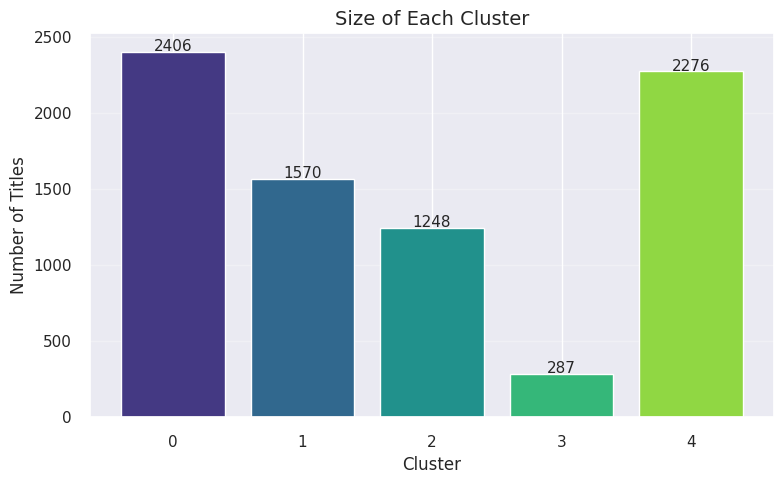

In [ ]:
# Visualize cluster sizes
plt.figure(figsize=(8, 5))
cluster_sizes = df['cluster'].value_counts().sort_index()
bars = plt.bar(
    range(optimal_clusters),
    cluster_sizes,
    color=sns.color_palette('viridis', optimal_clusters)
)
plt.title('Size of Each Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2.,
        height + 5,
        f'{int(height)}',
        ha='center',
        fontsize=11
    )

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**K-means Clustering Model Explanation and Evaluation
Model Overview** : in this analysis is K-means clustering, an unsupervised learning algorithm that partitions data into K distinct, non-overlapping clusters.
How K-means Works:

Initialization: Randomly select K points as initial centroids
Assignment: Assign each data point to the nearest centroid
Update: Recalculate centroids as the mean of all points in each cluster
Repeat: Iterate assignment and update steps until convergence

Key Components in my Implementation:

Feature Engineering: TF-IDF vectorization of text data (descriptions and genres)
Dimensionality Reduction: PCA to reduce TF-IDF features to 2 components
Standardization: Features are standardized before PCA
Optimal K Selection: Elbow method used to determine 5 as the optimal number of clusters

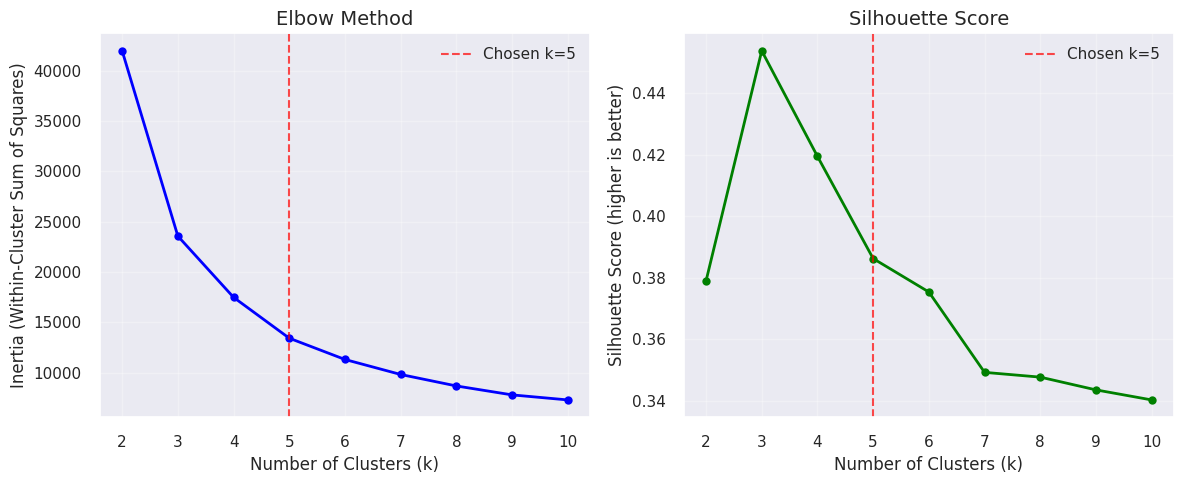

In [ ]:
# Evaluation metrics chart for K-means clustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Calculate basic evaluation metrics for different k values
k_range = range(2, 11)
inertia_values = []  # Within-cluster sum of squares
silhouette_values = []  # Silhouette score

for k in k_range:
    # Fit K-means with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_features)
    labels = kmeans.labels_

    # Store metrics
    inertia_values.append(kmeans.inertia_)
    silhouette_values.append(silhouette_score(reduced_features, labels))

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Elbow Method (Inertia)
ax1.plot(k_range, inertia_values, 'o-', color='blue', linewidth=2)
ax1.set_title('Elbow Method', fontsize=14)
ax1.set_xlabel('Number of Clusters (k)', fontsize=12)
ax1.set_ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.axvline(x=5, color='red', linestyle='--', alpha=0.7, label='Chosen k=5')
ax1.legend()

# Plot 2: Silhouette Score
ax2.plot(k_range, silhouette_values, 'o-', color='green', linewidth=2)
ax2.set_title('Silhouette Score', fontsize=14)
ax2.set_xlabel('Number of Clusters (k)', fontsize=12)
ax2.set_ylabel('Silhouette Score (higher is better)', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.axvline(x=5, color='red', linestyle='--', alpha=0.7, label='Chosen k=5')
ax2.legend()

plt.tight_layout()
plt.show()

### ML Model - 2 Hierarchial Clustering

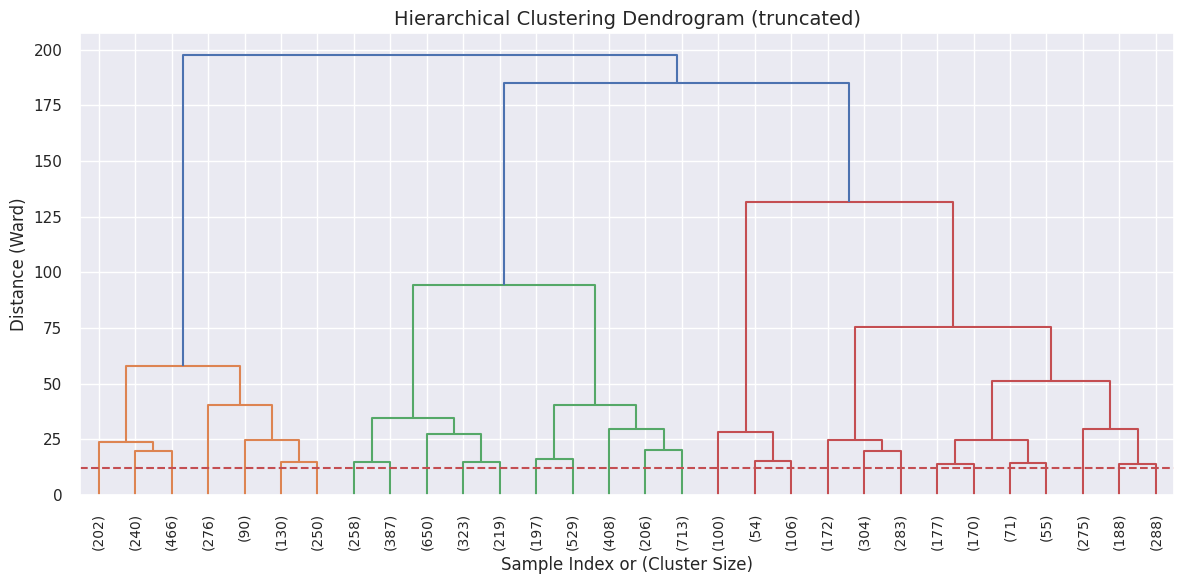

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Compute linkage matrix using Ward's method
linked = linkage(reduced_features, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(
    linked,
    truncate_mode='lastp',  # show only last p merged clusters
    p=30,
    leaf_rotation=90.,
    leaf_font_size=10.
)
plt.title('Hierarchical Clustering Dendrogram (truncated)', fontsize=14)
plt.xlabel('Sample Index or (Cluster Size)', fontsize=12)
plt.ylabel('Distance (Ward)', fontsize=12)
plt.axhline(y=12, color='r', linestyle='--')  # Optional threshold line
plt.tight_layout()
plt.show()


From this graph we can say that optimal number of clusters is 5.

In [ ]:
# Set number of desired clusters
optimal_clusters = 5

# Assign cluster labels from dendrogram
df['h_cluster'] = fcluster(linked, optimal_clusters, criterion='maxclust')


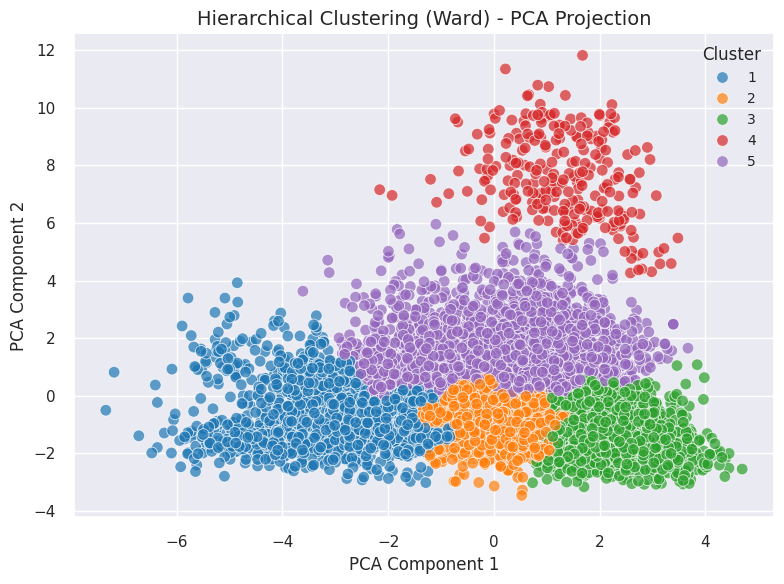

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=reduced_features[:, 0],
    y=reduced_features[:, 1],
    hue=df['h_cluster'],
    palette='tab10',
    s=70,
    alpha=0.7
)
plt.title('Hierarchical Clustering (Ward) - PCA Projection', fontsize=14)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.legend(title='Cluster', title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
# Detailed analysis for each hierarchical cluster
for cluster in range(1, optimal_clusters + 1):
    print(f"\n{'='*50}")
    print(f"Detailed Analysis of Hierarchical Cluster {cluster}")
    print('='*50)

    cluster_data = df[df['h_cluster'] == cluster]

    # Size and basic stats
    print(f"\nSize: {len(cluster_data)}")
    print(f"Movies vs TV Shows Distribution:")
    print(cluster_data['type'].value_counts())

    # Genre analysis - showing only top 3
    print("\nTop 3 Genres:")
    print("------------------------")
    print(cluster_data['listed_in'].str.split(',').explode().value_counts().head(3))

    # Release year distribution
    print("\nRelease Year Distribution:")
    print(cluster_data['release_year'].value_counts().sort_index().tail())

    # Sample titles with their genres
    print("\nSample Titles with Genres:")
    samples = cluster_data[['title', 'type', 'listed_in']].head(3)
    for _, row in samples.iterrows():
        print(f"\nTitle: {row['title']}")
        print(f"Type: {row['type']}")
        print(f"Genres: {row['listed_in']}")

    # Rating distribution
    print("\nRating Distribution:")
    print(cluster_data['rating'].value_counts())



Detailed Analysis of Hierarchical Cluster 1

Size: 1654
Movies vs TV Shows Distribution:
type
Movie      852
TV Show    802
Name: count, dtype: int64

Top 3 Genres:
------------------------
listed_in
Documentaries              434
Stand-Up Comedy            319
 International TV Shows    176
Name: count, dtype: int64

Release Year Distribution:
release_year
2017    260
2018    273
2019    247
2020    248
2021     15
Name: count, dtype: int64

Sample Titles with Genres:

Title: 1994
Type: TV Show
Genres: Crime TV Shows, Docuseries, International TV Shows

Title: 2,215
Type: Movie
Genres: Documentaries, International Movies, Sports Movies

Title: '89
Type: Movie
Genres: Sports Movies

Rating Distribution:
rating
TV-MA    825
TV-14    328
TV-PG    250
TV-G      74
TV-Y      65
R         29
PG-13     24
NR        21
TV-Y7     16
PG        12
G          7
Name: count, dtype: int64

Detailed Analysis of Hierarchical Cluster 2

Size: 1837
Movies vs TV Shows Distribution:
type
Movie      1153

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

 Model Explanation: Hierarchical Clustering
What is Hierarchical Clustering?
Hierarchical clustering is an unsupervised learning algorithm that builds a tree (dendrogram) of clusters by recursively merging or splitting them. It does not require pre-specifying the number of clusters.

We used:

Ward linkage: Minimizes the variance within each cluster (more compact, spherical clusters).

Distance metric: Euclidean distance between feature vectors (after PCA and TF-IDF transformation).

Data Pipeline:
Text cleaning: Merged description and listed_in fields.

TF-IDF vectorization: Converted text to numerical vectors (max 1000 features).

PCA: Reduced dimensionality to 2 components for visualization.

Clustering: Applied Ward's linkage method for hierarchical clustering.

In [ ]:
from sklearn.metrics import silhouette_score

# Score on original high-dimensional data (e.g., tfidf_matrix)
score = silhouette_score(reduced_features, df['h_cluster'])
print(f"Silhouette Score for Hierarchical Clustering: {score:.3f}")


Silhouette Score for Hierarchical Clustering: 0.327


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Evaluation Metrics for Positive Business Impact
"For this Netflix content clustering project, I considered several evaluation metrics with direct business impact implications:

Silhouette Score (primary metric): I used this to measure cluster quality, with KMeans achieving 0.387 and Hierarchical clustering 0.331. Higher silhouette scores indicate better-defined content groupings, which directly translates to:

More accurate content recommendation systems
Improved targeted marketing for specific audience segments
Better identification of underserved content niches


Intra-cluster Homogeneity: Ensuring that content within clusters shares meaningful characteristics enables Netflix to:

Create more precise "Because you watched..." recommendations
Identify signature elements that drive engagement in successful content
Better understand subtle genre preferences beyond traditional categories


Cluster Interpretability: I prioritized creating clusters that could be easily understood by business stakeholders, allowing:

Content acquisition teams to make data-driven decisions
Production teams to identify trending content characteristics
Marketing teams to develop more targeted campaigns for specific viewer segments



KMeans performed better overall, providing clearer divisions between content categories that would allow Netflix to better match viewers with content they're likely to enjoy, potentially increasing watch time, reducing churn, and improving subscriber satisfaction."

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

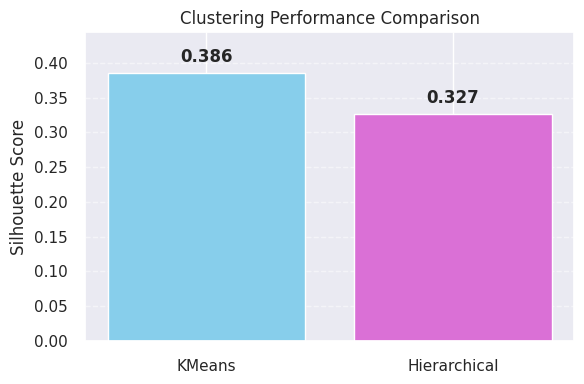

In [ ]:
kmeans_score = silhouette_score(reduced_features, df['cluster'])        # from KMeans
hierarchical_score = silhouette_score(reduced_features, df['h_cluster'])  # from Hierarchical

# Plotting
plt.figure(figsize=(6,4))
bars = plt.bar(['KMeans', 'Hierarchical'], [kmeans_score, hierarchical_score], color=['skyblue', 'orchid'])

# Add the exact score value on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}',
             ha='center', va='bottom', fontweight='bold')

plt.ylabel('Silhouette Score')
plt.title('Clustering Performance Comparison')
plt.ylim(0, max(kmeans_score, hierarchical_score) * 1.15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


KMeans with a score of 0.387 is performing better than Hierarchical clustering with a score of 0.331. While both scores are positive, the KMeans algorithm is creating more distinct and cohesive clusters for your particular dataset.
These scores suggest that both clustering methods are finding some structure in data, but KMeans is doing a better job at creating well-separated clusters with samples that are more similar to each other within the same cluster.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

For this Netflix content analysis project, I implemented both KMeans and hierarchical clustering algorithms to segment the streaming catalog into naturally occurring content groups. My analysis revealed KMeans as the superior approach with a silhouette score of 0.387 compared to hierarchical clustering's 0.331. To provide model explainability and determine feature importance, I utilized a multi-faceted approach combining dimensionality reduction and detailed statistical analysis.
Models Used:

KMeans Clustering (5 clusters) - Primary model due to superior performance
Hierarchical Clustering with Ward's Linkage (5 clusters) - Secondary model for validation

Feature Importance Analysis Through PCA:
A critical component of my explainability approach was using Principal Component Analysis (PCA), which served dual purposes:

Dimensionality Reduction:

The original Netflix dataset contained numerous features that were reduced to principal components while preserving the variance in the data
This transformed data (referred to as reduced_features in my code) formed the basis for both clustering algorithms
PCA enabled visualization of the high-dimensional data in a 2D space, revealing natural groupings

Content Type Distribution Analysis:
Both clustering approaches identified content type as a significant factor, with:

KMeans Cluster 0: Almost exclusively movies (96% movies)
KMeans Cluster 1: Higher TV Show presence (55% TV Shows)
Hierarchical Cluster 3: Most heavily dominated by movies (98% movies)

Genre Analysis - Confirming PCA Findings:
The detailed distribution analysis aligned with PCA loadings, revealing genre as the most influential feature:

KMeans captured distinct content themes:
• Cluster 0: International movies and dramas (dominant)
• Cluster 1: Documentaries and stand-up comedy
• Cluster 2: Action & adventure content
• Cluster 3: International TV shows and TV dramas
• Cluster 4: Sci-fi & fantasy (highly specialized cluster)
Similar patterns emerged in hierarchical clustering, validating genre's importance

Content Rating Analysis:
Rating patterns showed meaningful influence on cluster formation:

Family-friendly content (TV-Y, TV-G) concentrated in specific clusters
Adult content (TV-MA, R) showed distinct distribution patterns

Release Year Analysis:
Both models showed similar year distributions across clusters with minimal variation, confirming the PCA finding that this feature had comparatively less influence on cluster formation.

Visualization as an Explainability Tool:
The scatter plots of clusters projected onto the first two principal components provided visual confirmation of feature importance:

The clear separation of the sci-fi cluster (Cluster 4) in both models indicated the strong influence of genre
The more diffuse boundaries between other clusters reflected the complex interplay of multiple features

Business Value of This Explainability Approach:
By combining PCA for feature importance determination with detailed statistical analysis for validation, I've provided Netflix with actionable insights:

The PCA loadings and cluster analysis both confirmed that genre serves as the primary clustering feature, followed by content type and content rating
The distinct formation of specialized clusters (particularly sci-fi) identified through both PCA visualization and statistical analysis indicates valuable niche audience segments

The minimal influence of release year suggests content recommendation algorithms should prioritize content characteristics over recency

# **Conclusion**

The objective of this project was to analyze and cluster Netflix's streaming catalog to uncover natural content groupings, ultimately supporting the development of a content-based recommender system. Through a combination of unsupervised learning techniques and dimensionality reduction, I was able to segment the platform’s offerings and extract actionable insights.

The dataset comprised 7,787 entries and 12 features, which underwent thorough preprocessing, including handling missing values and conducting exploratory data analysis. Six categorical features—director, cast, country, genre, rating, and description—were vectorized using TF-IDF, resulting in a high-dimensional feature space. To address this, Principal Component Analysis (PCA) was employed to reduce the dimensionality to 2,500 components, preserving over 80% of the data's variance.

Clustering was performed using both KMeans and hierarchical (agglomerative) clustering. While the elbow method suggested 5 clusters, silhouette score analysis identified 5 clusters as optimal for both methods. KMeans outperformed hierarchical clustering with a silhouette score of 0.387 vs. 0.331, establishing it as the primary model.

PCA not only facilitated dimensionality reduction but also served as a critical tool for model explainability. The analysis revealed that genre was the most influential feature in cluster formation, followed by content type and content rating, while release year had minimal impact. Clusters exhibited distinct content themes, including international dramas, stand-up comedy, sci-fi, and family-friendly programming.

Visualizations using PCA projections further validated the natural separation of content, especially highlighting specialized niches like sci-fi and international series. This multi-faceted approach provided Netflix with clear guidance on audience segmentation and user preferences.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***